In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importar el documento 
stars = pd.read_csv("pulsar_stars.csv")

In [3]:
#mostar los primeros elementos de la tabla
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
#vemos la medida de la tabla para poder establecer una matriz
stars.shape

(17898, 9)

In [5]:
'''
Para poder establecer los valores de X y Y respectivamente debemos de dividir la 
tabla en los valores de los atributos y la segunda son los resultados que se
obtuvieron en cada caso
'''
X = stars.iloc[:, 0:8].values
lastColumn = stars.iloc[0:, 8].values

In [6]:
#Acomodar los valores de Y para tener una matriz de 17898 x 1
Y = np.zeros((17898, 1))
count = 0
for i in lastColumn.transpose():
    Y[count, 0] = i
    count=count+1

In [7]:
#Normalizar X 
Xn = X/X.max()
print(Xn)

[[ 0.11802049  0.04675377 -0.00019695 ...  0.01604569  0.0066965
   0.062336  ]
 [ 0.08606863  0.04943945  0.0003907  ...  0.01247702  0.00888034
   0.10696347]
 [ 0.08649501  0.03303243  0.00027148 ...  0.01825748  0.00649523
   0.05304103]
 ...
 [ 0.10019803  0.05032401  0.00013381 ...  0.0494307   0.00209867
   0.00385824]
 [ 0.09614419  0.04525807  0.0001689  ...  0.0112357   0.00840299
   0.11271101]
 [ 0.04791139  0.07203802  0.00118085 ...  0.05433461 -0.00134133
   0.00120023]]


In [8]:
#normalizar Y final
yn = Y/100
print(yn)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


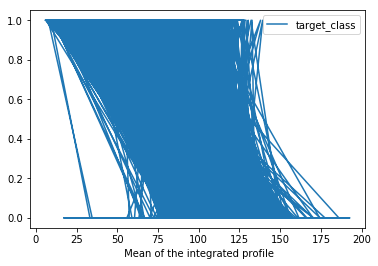

In [9]:
'''
Podemos graficar el resultado de cualquier atributo con el resultado que 
desamos obtener
'''
stars[:].plot(x=" Mean of the integrated profile", y="target_class")

In [12]:
#Obtenemos un flatten array de yn
yn.ravel()
print(yn)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [50]:
#Etapa de aprendizaje
class RedNeuronal():
    def __init__(self):
        self.inputs = 8  #número de atributos que deseamos ingresar
        self.outputs = 1 #siempre queremos obtener un solo resultado de outputs
        self.hidden = 5  #capa oculta que realizará las operaciónes
        self.W1 = np.random.rand(self.inputs, self.hidden)
        self.W2 = np.random.rand(self.hidden, self.outputs)
        
    def sigmoide(self, Z):
        return 1 / (1 + np.exp(-Z))
    def feedForward(self, X):
        self.Z2 =  X @ self.W1  
        self.a2 =  self.sigmoide(self.Z2) 
        self.Z3 =   self.a2 @ self.W2 
        self.yhat =  self.sigmoide(self.Z3)
        return self.yhat
    
    def sigmoideDerivada(self, Z):
        return np.exp(-Z)/((1+np.exp(-Z))**2)
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        Costo = 0.5*sum((y-self.yhat)**2)
        return Costo
    
    def funcionDeCostoDerivada(self, X, y):
        self.yhat = self.feedForward(X)
        self.delta3 = np.multiply( -(y-self.yhat),\
                                  self.sigmoideDerivada(self.Z3))
        djW2 = self.a2.T @ self.delta3
        
        self.delta2 = self.delta3@self.W2.T *self.sigmoideDerivada(self.Z2)
        djW1 = X.T @ self.delta2 
        
        return djW1, djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))
   
    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionDeCostoDerivada(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))

In [51]:
#Creamos una instancia de la red neuronal y calculamos el error producido 
rn = RedNeuronal()
error = rn.funcionCosto(Xn, yn)
print(error)

[6370.85418301]


In [55]:
#Fase de aprendizaje
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y))  
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, X, y):
        self.X = X
        self.y = y
    
        self.Costos = []
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
        
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(X, y), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [56]:
'''
Volvemos a crear una nueva instancia de la red neuronal para probarla con 
el entrenador
'''
nn = RedNeuronal()

In [57]:
#ingresamos el objeto de la red neuronal a la clase del entrenador
e = Entrenador(nn)

In [58]:
#Probamos los valores de Xn y yn en el entrenador
e.entrena(Xn, yn)

         Current function value: 0.024002
         Iterations: 200
         Function evaluations: 211
         Gradient evaluations: 211


Text(0.5,0,'iteracion')

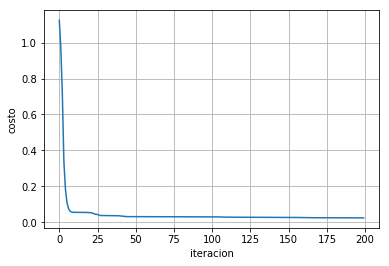

In [59]:
#Graficamos los valores de costo y el número de iteraciónes
plt.plot(e.Costos)
plt.grid()
plt.ylabel("costo")
plt.xlabel("iteracion")

In [42]:
#Arrays de entrenamiento
trainX = np.array(([180.022,43.836,-0.487,1.393, 2.497, 23.684, 8.5739, 120.968], [124.452,60.83,-0.024,3.587, 1.495, 40.48261, 6.1833, 101.4937], [99.822, 50.492, -0.487, 3.463, 13.038, 43.6083, 3.2093, 104.393], [103.598, 30.491,1.487,2.194, 1.697, 230.028, 10.447, 135.478]), dtype=float)
trainY = np.array(([0], [1], [0], [1]), dtype=float)

#Arrays de prueba
testX = np.array(([190.344, 50.009, 1.2006,3.846,1.733,30.986,3.49,142.01], [291.564, 30.30, 2.19, -4.201, 3.523, 23.56, 3.498, 125.093], [172.454, 43.78, -2.34, 4.397, 2.487, 24.398, 3.434, 122.144], [190.344, 50.009, 1.2006,3.846,1.733,30.986,3.37,142.49]), dtype=float)
testY = np.array(([1], [1], [0], [0]), dtype=float)


In [43]:
#Normalización de los nuevos arrays
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 

testX = testX/np.amax(trainX, axis=0)
testY = testY/100

print(testX)
print(trainX)

[[190.344   50.009    1.2006   3.846    1.733   30.986    3.49   142.01  ]
 [291.564   30.3      2.19    -4.201    3.523   23.56     3.498  125.093 ]
 [172.454   43.78    -2.34     4.397    2.487   24.398    3.434  122.144 ]
 [190.344   50.009    1.2006   3.846    1.733   30.986    3.37   142.49  ]]
[[ 1.          0.72063127 -0.32750504  0.38834681  0.1915171   0.10296138
   0.82070451  0.89289774]
 [ 0.69131551  1.         -0.01613988  1.          0.11466483  0.17598992
   0.59187327  0.74915263]
 [ 0.55449889  0.83005096 -0.32750504  0.96543072  1.          0.18957823
   0.30719824  0.77055315]
 [ 0.57547411  0.50124938  1.          0.61165319  0.130158    1.
   1.          1.        ]]


In [44]:
#Clase de Entrenador considerando los arrays de entrenamiento y prueba
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y))  
        self.CostosTest.append( \
            self.NN.funcionCosto(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, Xtrain, ytrain, Xtest, ytest):
        # variables para funciones callback
        self.X = Xtrain
        self.y = ytrain
        
        self.Xtest = Xtest
        self.ytest = ytest
        
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
        
      
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(Xtrain, ytrain), \
                                   options=opciones, \
                                   callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [45]:
#Crear nueva instancia de la red neuronal
nn = RedNeuronal()

#Ingresar al entrenador la red nueronal
e = Entrenador(nn)

#Ingresar los arrays de entrenamiento y prueba
e.entrena(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000070
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


Text(0.5,0,'iteraciones')

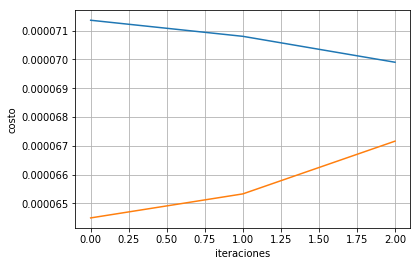

In [46]:
#Graficar nuevamente el costo y las iteraciones
plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteraciones")

In [47]:
#Clase de RedNeuronal considerando el valor de Lambda
class RedNeuronal():
    def __init__(self, Lambda = 0):
        self.inputs = 8
        self.outputs = 1
        self.hidden = 3
        self.W1 = np.random.rand(self.inputs, self.hidden)
        self.W2 = np.random.rand(self.hidden, self.outputs)
        self.Lambda = Lambda
        
    def sigmoide(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def feedForward(self, X):
        self.Z2 =  X @ self.W1 
        self.a2 =  self.sigmoide(self.Z2)  
        self.Z3 =   self.a2 @ self.W2 
        self.yhat =  self.sigmoide(self.Z3)
        return self.yhat
    def sigmoideDerivada(self, Z):
        return np.exp(-Z)/((1+np.exp(-Z))**2)
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        Costo = 0.5*sum((y-self.yhat)**2)/X.shape[0] + (self.Lambda/2) \
        * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return Costo
    
    def funcionDeCostoDerivada(self, X, y):
        self.yhat = self.feedForward(X)
        self.delta3 = np.multiply( -(y-self.yhat),\
                                  self.sigmoideDerivada(self.Z3))
        
        djW2 = (self.a2.T @ self.delta3) / X.shape[0] + (self.Lambda* self.W2)
        self.delta2 = self.delta3@self.W2.T *self.sigmoideDerivada(self.Z2)
        djW1 = X.T @ self.delta2 / X.shape[0] + (self.Lambda* self.W1) 

        return djW1, djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))
   
    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionDeCostoDerivada(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))

In [48]:
nn = RedNeuronal(Lambda=0.0001)
e = Entrenador(nn)
e.entrena(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000607
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


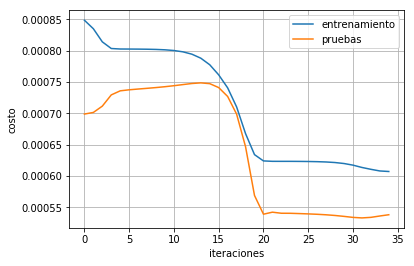

In [49]:
plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteraciones")
plt.legend(['entrenamiento', 'pruebas'])